Dataset: Rain in Australia from Kaggle
Objective: Melihat perbandingan akutrasi dan recall sebelum dan setelah penggunaan PCA dengan algoritma klasifikasi Naive Bayes

# Import Library

In [ ]:
# Library untuk manipulasi data
import pandas as pd
import numpy as np

# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk manipulasi sparse matrix
from scipy.sparse import coo_matrix, hstack

# Library untuk pemodelan dan evaluasi model
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from prettytable import PrettyTable
import warnings

# Load Dataset

In [ ]:
import gdown

# ID file Google Drive
file_id = "1qSLfjwOtTiXsAby7rTtMuaALSpakaTPk"
url = f"https://drive.google.com/uc?id={file_id}"

# Nama file output
output = 'weatherAUS.csv'

# Unduh file dari Google Drive
gdown.download(url, output, quiet=False)

# Muat dataset ke dalam pandas dataframe
df = pd.read_csv(output)

Downloading...
From: https://drive.google.com/uc?id=1qSLfjwOtTiXsAby7rTtMuaALSpakaTPk
To: /content/weatherAUS.csv
100%|██████████| 14.1M/14.1M [00:00<00:00, 53.9MB/s]


# Data Understanding

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [ ]:
# Pastikan kolom 'Date' dalam format datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Mendapatkan tanggal terawal dan tanggal terakhir
start_date = df['Date'].min()
end_date = df['Date'].max()

print(f"Tanggal data terawal: {start_date}")
print(f"Tanggal data terakhir: {end_date}")


Tanggal data terawal: 2007-11-01 00:00:00
Tanggal data terakhir: 2017-06-25 00:00:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [ ]:
df['Date'].unique()

<DatetimeArray>
['2008-12-01 00:00:00', '2008-12-02 00:00:00', '2008-12-03 00:00:00',
 '2008-12-04 00:00:00', '2008-12-05 00:00:00', '2008-12-06 00:00:00',
 '2008-12-07 00:00:00', '2008-12-08 00:00:00', '2008-12-09 00:00:00',
 '2008-12-10 00:00:00',
 ...
 '2008-01-22 00:00:00', '2008-01-23 00:00:00', '2008-01-24 00:00:00',
 '2008-01-25 00:00:00', '2008-01-26 00:00:00', '2008-01-27 00:00:00',
 '2008-01-28 00:00:00', '2008-01-29 00:00:00', '2008-01-30 00:00:00',
 '2008-01-31 00:00:00']
Length: 3436, dtype: datetime64[ns]

In [ ]:
# Mengonversi kolom Date menjadi tipe datetime jika belum
df['Date'] = pd.to_datetime(df['Date'])

# Menampilkan tanggal paling awal dan paling akhir dengan format tertentu
date_min = df['Date'].min().strftime('%Y-%m-%d')
date_max = df['Date'].max().strftime('%Y-%m-%d')

print(f"Tanggal paling awal: {date_min}")
print(f"Tanggal paling akhir: {date_max}")


Tanggal paling awal: 2007-11-01
Tanggal paling akhir: 2017-06-25


In [ ]:
# Menampilkan rentang nilai setiap kolom
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:  # Memastikan hanya kolom numerik yang dihitung
        print(f"{column}: {df[column].min()} - {df[column].max()}")


MinTemp: -8.5 - 33.9
MaxTemp: -4.8 - 48.1
Rainfall: 0.0 - 371.0
Evaporation: 0.0 - 145.0
Sunshine: 0.0 - 14.5
WindGustSpeed: 6.0 - 135.0
WindSpeed9am: 0.0 - 130.0
WindSpeed3pm: 0.0 - 87.0
Humidity9am: 0.0 - 100.0
Humidity3pm: 0.0 - 100.0
Pressure9am: 980.5 - 1041.0
Pressure3pm: 977.1 - 1039.6
Cloud9am: 0.0 - 9.0
Cloud3pm: 0.0 - 9.0
Temp9am: -7.2 - 40.2
Temp3pm: -5.4 - 46.7


In [ ]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [ ]:
# Menghitung jumlah baris untuk setiap label pada kolom Location
location_counts = df['Location'].value_counts()

# Menampilkan hasil
print(location_counts)


Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown     

In [ ]:
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [ ]:
# Menghitung jumlah baris untuk setiap label pada kolom WindGustDir
windgustdir_counts = df['WindGustDir'].value_counts()

# Menampilkan hasil
print(windgustdir_counts)

WindGustDir
W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: count, dtype: int64


In [ ]:
# Menghitung jumlah baris untuk setiap label pada kolom WindDir9am
winddir9am_counts = df['WindDir9am'].value_counts()

# Menampilkan hasil
print(winddir9am_counts)

WindDir9am
N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: count, dtype: int64


In [ ]:
# Menghitung jumlah baris untuk setiap label pada kolom WindDir3pm
winddir3pm_counts = df['WindDir3pm'].value_counts()

# Menampilkan hasil
print(winddir3pm_counts)

WindDir3pm
SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: count, dtype: int64


In [ ]:
# Menghitung jumlah baris untuk setiap label pada kolom RainToday
raintoday_counts = df['RainToday'].value_counts()

# Menampilkan hasil
print(raintoday_counts)

RainToday
No     110319
Yes     31880
Name: count, dtype: int64


In [ ]:
# Menghitung jumlah baris untuk setiap label pada kolom RainTomorrow
raintomorrow_counts = df['RainTomorrow'].value_counts()

# Menampilkan hasil
print(raintomorrow_counts)

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64


In [ ]:
# Menggunakan len() untuk menghitung jumlah total data pada kolom WindGustDir
total_count = len(df['WindGustDir'])

# Atau menggunakan .count() untuk menghitung jumlah total data pada kolom WindGustDir
total_count = df['WindGustDir'].count()

print(f"Total jumlah data pada kolom WindGustDir: {total_count}")


Total jumlah data pada kolom WindGustDir: 135134


In [ ]:
df.shape

(145460, 23)

In [ ]:
# cek jumlah duplikasi data
df.duplicated().sum()

0

In [ ]:
# cek missing value
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


In [ ]:
# Cek persentase missing value
# Checking data completeness
missing = pd.DataFrame(df.isnull().sum(), columns = ['number of missing value'])

missing['% missing_values'] = (missing/len(df)).round(2)*100

missing

,number of missing value,% missing_values
Date,0,0.0
Location,0,0.0
MinTemp,1485,1.0
MaxTemp,1261,1.0
Rainfall,3261,2.0
Evaporation,62790,43.0
Sunshine,69835,48.0
WindGustDir,10326,7.0
WindGustSpeed,10263,7.0
WindDir9am,10566,7.0


# Data Cleaning

## 1. Handling Inconsistency Data

In [ ]:
# making all columns names into lowercase
df.columns = df.columns.str.strip().str.lower()

In [ ]:
# Ubah ke dalam format datetime
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.head()

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,...,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
# Extract format date ke dengan menambahkan kolom Year, Month, dan Day secara terpisah
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [ ]:
df.head()

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,...,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow,year,month,day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [ ]:
# Drop fitur date
df.drop('date', axis=1, inplace=True)

In [ ]:
df.head()

,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,...,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [ ]:
# Memindahkan kolom day, month, year ke posisi pertama
cols = ['day', 'month', 'year'] + [col for col in df.columns if col not in ['day', 'month', 'year']]
df = df[cols]

In [ ]:
df.head()

,day,month,year,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,...,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
0,1,12,2008,Albury,13.4,22.9,0.6,NaN,NaN,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2,12,2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,3,12,2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,4,12,2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,5,12,2008,Albury,17.5,32.3,1.0,NaN,NaN,W,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
# Menampilkan rentang nilai setiap kolom
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:  # Memastikan hanya kolom numerik yang dihitung
        print(f"{column}: {df[column].min()} - {df[column].max()}")

mintemp: -8.5 - 33.9
maxtemp: -4.8 - 48.1
rainfall: 0.0 - 371.0
evaporation: 0.0 - 145.0
sunshine: 0.0 - 14.5
windgustspeed: 6.0 - 135.0
windspeed9am: 0.0 - 130.0
windspeed3pm: 0.0 - 87.0
humidity9am: 0.0 - 100.0
humidity3pm: 0.0 - 100.0
pressure9am: 980.5 - 1041.0
pressure3pm: 977.1 - 1039.6
cloud9am: 0.0 - 9.0
cloud3pm: 0.0 - 9.0
temp9am: -7.2 - 40.2
temp3pm: -5.4 - 46.7


## 2. Handling Missing Value

In [ ]:
df.isnull().sum()

,0
day,0
month,0
year,0
location,0
mintemp,1485
maxtemp,1261
rainfall,3261
evaporation,62790
sunshine,69835
windgustdir,10326


Penanganan missing value akan dipisah berdasarkan fitur kategori dan fitur numerik

In [ ]:
# Get list of categorical variables
s = (df.dtypes == "object")
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['location', 'windgustdir', 'winddir9am', 'winddir3pm', 'raintoday', 'raintomorrow']


In [ ]:
# Filling missing values with mode of the column in value

for i in object_cols:
    df[i].fillna(df[i].mode()[0], inplace=True)

<ipython-input-17-e2634b01738b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0], inplace=True)


In [ ]:
#cek missing value saat ini
df.isnull().sum()

,0
day,0
month,0
year,0
location,0
mintemp,1485
maxtemp,1261
rainfall,3261
evaporation,62790
sunshine,69835
windgustdir,0


Sekarang, penanganan missing value pada fitur numerik

In [ ]:
# Get list of neumeric variables
t = (df.dtypes == "float64")
num_cols = list(t[t].index)

print("Neumeric variables:")
print(num_cols)

Neumeric variables:
['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine', 'windgustspeed', 'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm']


In [ ]:
# Missing values in numeric variables

for i in num_cols:
    print(i, df[i].isnull().sum())

mintemp 1485
maxtemp 1261
rainfall 3261
evaporation 62790
sunshine 69835
windgustspeed 10263
windspeed9am 1767
windspeed3pm 3062
humidity9am 2654
humidity3pm 4507
pressure9am 15065
pressure3pm 15028
cloud9am 55888
cloud3pm 59358
temp9am 1767
temp3pm 3609


In [ ]:
# Menampilkan deskripsi statistik untuk beberapa kolom sekaligus
df[['evaporation', 'sunshine', 'cloud9am', 'cloud3pm', 'pressure9am', 'pressure3pm']].describe()

,evaporation,sunshine,cloud9am,cloud3pm,pressure9am,pressure3pm
count,82670.000000,75625.000000,89572.000000,86102.000000,130395.00000,130432.000000
mean,5.468232,7.611178,4.447461,4.509930,1017.64994,1015.255889
std,4.193704,3.785483,2.887159,2.720357,7.10653,7.037414
min,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000
25%,2.600000,4.800000,1.000000,2.000000,1012.90000,1010.400000
50%,4.800000,8.400000,5.000000,5.000000,1017.60000,1015.200000
75%,7.400000,10.600000,7.000000,7.000000,1022.40000,1020.000000
max,145.000000,14.500000,9.000000,9.000000,1041.00000,1039.600000


Pada pengecekan missing value pada fitur numerik di atas, jumlah kolom yang memiliki banyak missing value terdapat pada kolom evaporation, sunshine, pressure9am, pressure3pm, cloud9am, dan cloud3pm. Untuk itu mari kita cek persebaran statistik dari kolom-kolom ini.

In [ ]:
# Cek kolom evaporation
df['evaporation'].describe()

,evaporation
count,82670.000000
mean,5.468232
std,4.193704
min,0.000000
25%,2.600000
50%,4.800000
75%,7.400000
max,145.000000


Pada kolom evaporation, nilai 75% adalah 7.4. Dari deskripsi tersebut, kita dapat melihat bahwa ada rentang data yang cukup besar hingga mencapai nilai maksimum sebesar 145, yang sangat jauh dari nilai rata-rata. Imputasi denganmedian dilakukan karena distribusi data tampaknya memiliki beberapa nilai ekstrem atau outlier yang cukup besar. Median lebih tepat digunakan dalam kasus seperti ini karena tidak terlalu terpengaruh oleh nilai ekstrem, sehingga memberikan representasi yang lebih tepat dari "tengah" distribusi tersebut.

In [ ]:
# Cek kolom sunshine
df['sunshine'].describe()

,sunshine
count,75625.000000
mean,7.611178
std,3.785483
min,0.000000
25%,4.800000
50%,8.400000
75%,10.600000
max,14.500000


Pada kolom sunshine, nilai 75% adalah 10.6, yang artinya 75% dari data berada di bawah angka ini. Imputasi dengan mean dilakukan karena nilai distribusi data pada kolom ini tampaknya relatif seimbang, tanpa terlalu banyak outlier. Rata-rata atau mean adalah representasi yang baik dari pusat distribusi data yang seimbang.

In [ ]:
# Cek kolom pressure9am
df['pressure9am'].describe()

,pressure9am
count,130395.00000
mean,1017.64994
std,7.10653
min,980.50000
25%,1012.90000
50%,1017.60000
75%,1022.40000
max,1041.00000


In [ ]:
# Cek kolom pressure3pm
df['pressure3pm'].describe()

,pressure3pm
count,130432.000000
mean,1015.255889
std,7.037414
min,977.100000
25%,1010.400000
50%,1015.200000
75%,1020.000000
max,1039.600000


Untuk kolom pressure9am dan pressure3pm memiliki deskriptif yang mirip. Keduanya memiliki mean dan median (50%) yang cukup dekat, serta rentang interkuartile (IQR) yang tidak terlalu jauh berbeda. Ini menunjukkan bahwa kedua kolom memiliki distribusi yang cukup normal dan tidak terlalu terpengaruh oleh outlier yang signifikan.

Maka, dengan kondisi ini, imputasi nilai missing value pada kolom pressure9am dan pressure3pm bisa menggunakan mean, karena:
- Distribusi normal: mean akan lebih representatif pada distribusi yang tidak terlalu terpengaruh oleh outlier.
- Nilai tengah dan rata-rata yang dekat: mean dan median cukup dekat, menunjukkan bahwa data tidak skewed dan mean adalah pilihan yang tepat untuk imputasi.

In [ ]:
# Cek kolom cloud9am
df['cloud9am'].describe()

,cloud9am
count,89572.000000
mean,4.447461
std,2.887159
min,0.000000
25%,1.000000
50%,5.000000
75%,7.000000
max,9.000000


In [ ]:
# Cek kolom cloud3pm
df['cloud3pm'].describe()

,cloud3pm
count,86102.000000
mean,4.509930
std,2.720357
min,0.000000
25%,2.000000
50%,5.000000
75%,7.000000
max,9.000000


Pada kolom cloud9am dan cloud3pm, kita dapat melihat bahwa distribusi kedua kolom ini relatif simetris, karena nilai mean dan median cukup dekat. Meskipun ada sedikit standar deviasi, ini tidak terlalu mengindikasikan adanya skewness yang besar. Maka, untuk kolom cloud9am dan cloud3pm akan dilakukan imputasi menggunakan mean.

Penanganan missing value pada kolom dengan persentase missing value yang tergolong besar:
1. sunshine -> mean  
2. evaporation -> median
3. cloud9am -> mean
4. cloud3pm -> mean
5. pressure9am -> mean
6. pressure3pm -> mean

In [ ]:
from sklearn.impute import SimpleImputer


imputer1 = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer2 =SimpleImputer(missing_values = np.nan, strategy = 'median')

# kolom evaporation akan diimputasi dengan nilai median
df[['evaporation']] = imputer2.fit_transform(df[['evaporation']])

# kolom sunshine, cloud9am, cloud3pm, pressure9am, pressure3pm akan diimputasi dengan nilai mean
df[['sunshine']] = imputer1.fit_transform(df[['sunshine']])
df[['cloud3pm']] = imputer1.fit_transform(df[['cloud3pm']])
df[['cloud9am']] = imputer1.fit_transform(df[['cloud9am']])
df[['pressure9am']] = imputer1.fit_transform(df[['pressure9am']])
df[['pressure3pm']] = imputer1.fit_transform(df[['pressure3pm']])

In [ ]:
# Melihat missing value saat ini
df.isnull().sum()

,0
day,0
month,0
year,0
location,0
mintemp,1485
maxtemp,1261
rainfall,3261
evaporation,0
sunshine,0
windgustdir,0


In [ ]:
df.shape

(145460, 25)

In [ ]:
# Untuk sisanya, kita akan melakukan drop semua baris pada tiap kolom yang mengandung missing value
df = df.dropna()

In [ ]:
# Cek apakah ada missing value
df.isnull().sum()

,0
day,0
month,0
year,0
location,0
mintemp,0
maxtemp,0
rainfall,0
evaporation,0
sunshine,0
windgustdir,0


In [ ]:
df.shape

(130064, 25)

In [ ]:
# Melihat range indeks yang ada
print(df.index)

Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
            9,
       ...
       145449, 145450, 145451, 145452, 145453, 145454, 145455, 145456, 145457,
       145458],
      dtype='int64', length=130064)


In [ ]:
# Mereset indeks
df.reset_index(drop=True, inplace=True)

In [ ]:
df.head(3)

,day,month,year,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,...,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
0,1,12,2008,Albury,13.4,22.9,0.6,4.8,7.611178,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,2,12,2008,Albury,7.4,25.1,0.0,4.8,7.611178,WNW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,3,12,2008,Albury,12.9,25.7,0.0,4.8,7.611178,WSW,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No


In [ ]:
df.tail(3)

,day,month,year,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,...,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
130061,22,6,2017,Uluru,3.6,25.3,0.0,4.8,7.611178,NNW,...,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,No,No
130062,23,6,2017,Uluru,5.4,26.9,0.0,4.8,7.611178,N,...,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,No,No
130063,24,6,2017,Uluru,7.8,27.0,0.0,4.8,7.611178,SE,...,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,No,No


## 3. Handling Outlier

In [ ]:
df.describe()

,day,month,year,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm
count,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000
mean,15.728403,6.404124,2012.787474,12.123691,23.277205,2.306108,5.210608,7.646061,39.985169,14.206498,18.780139,68.617212,51.013970,1017.653472,1015.253719,4.443008,4.506343,16.944974,21.769776
std,8.797001,3.428395,2.522405,6.430929,7.130424,8.353050,3.220669,2.764185,13.579476,8.785694,8.688839,19.253883,20.846997,6.829975,6.754617,2.254677,2.109078,6.535238,6.988288
min,1.000000,1.000000,2007.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,8.000000,3.000000,2011.000000,7.500000,17.900000,0.000000,4.000000,7.611178,31.000000,7.000000,13.000000,57.000000,36.000000,1013.400000,1010.900000,3.000000,4.000000,12.200000,16.600000
50%,16.000000,6.000000,2013.000000,11.900000,22.800000,0.000000,4.800000,7.611178,39.000000,13.000000,19.000000,70.000000,51.000000,1017.649940,1015.255889,4.447461,4.509930,16.600000,21.250000
75%,23.000000,9.000000,2015.000000,16.800000,28.400000,0.600000,5.400000,8.900000,48.000000,20.000000,24.000000,83.000000,65.000000,1022.000000,1019.600000,6.000000,6.000000,21.600000,26.600000
max,31.000000,12.000000,2017.000000,33.900000,48.100000,367.600000,82.400000,14.500000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [ ]:
# # Mengekstrak fitur numerik ke dalam num_col
num_col = df.select_dtypes(include=np.number).columns.to_list()
len(num_col)

19

In [ ]:
# Mengecek outlier pada fitur numerik yang tersisa
for kolom in num_col:
    Q1 = df[kolom].quantile(0.25)
    Q3 = df[kolom].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Menampilkan jumlah outlier
    jumlah_outlier = ((df[kolom] < lower_limit) | (df[kolom] > upper_limit)).sum()
    print(f"Jumlah outlier pada kolom {kolom}: {jumlah_outlier}")

Jumlah outlier pada kolom day: 0
Jumlah outlier pada kolom month: 0
Jumlah outlier pada kolom year: 0
Jumlah outlier pada kolom mintemp: 39
Jumlah outlier pada kolom maxtemp: 298
Jumlah outlier pada kolom rainfall: 26016
Jumlah outlier pada kolom evaporation: 30154
Jumlah outlier pada kolom sunshine: 35823
Jumlah outlier pada kolom windgustspeed: 2929
Jumlah outlier pada kolom windspeed9am: 1162
Jumlah outlier pada kolom windspeed3pm: 2259
Jumlah outlier pada kolom humidity9am: 1398
Jumlah outlier pada kolom humidity3pm: 0
Jumlah outlier pada kolom pressure9am: 2036
Jumlah outlier pada kolom pressure3pm: 1726
Jumlah outlier pada kolom cloud9am: 0
Jumlah outlier pada kolom cloud3pm: 4457
Jumlah outlier pada kolom temp9am: 198
Jumlah outlier pada kolom temp3pm: 518


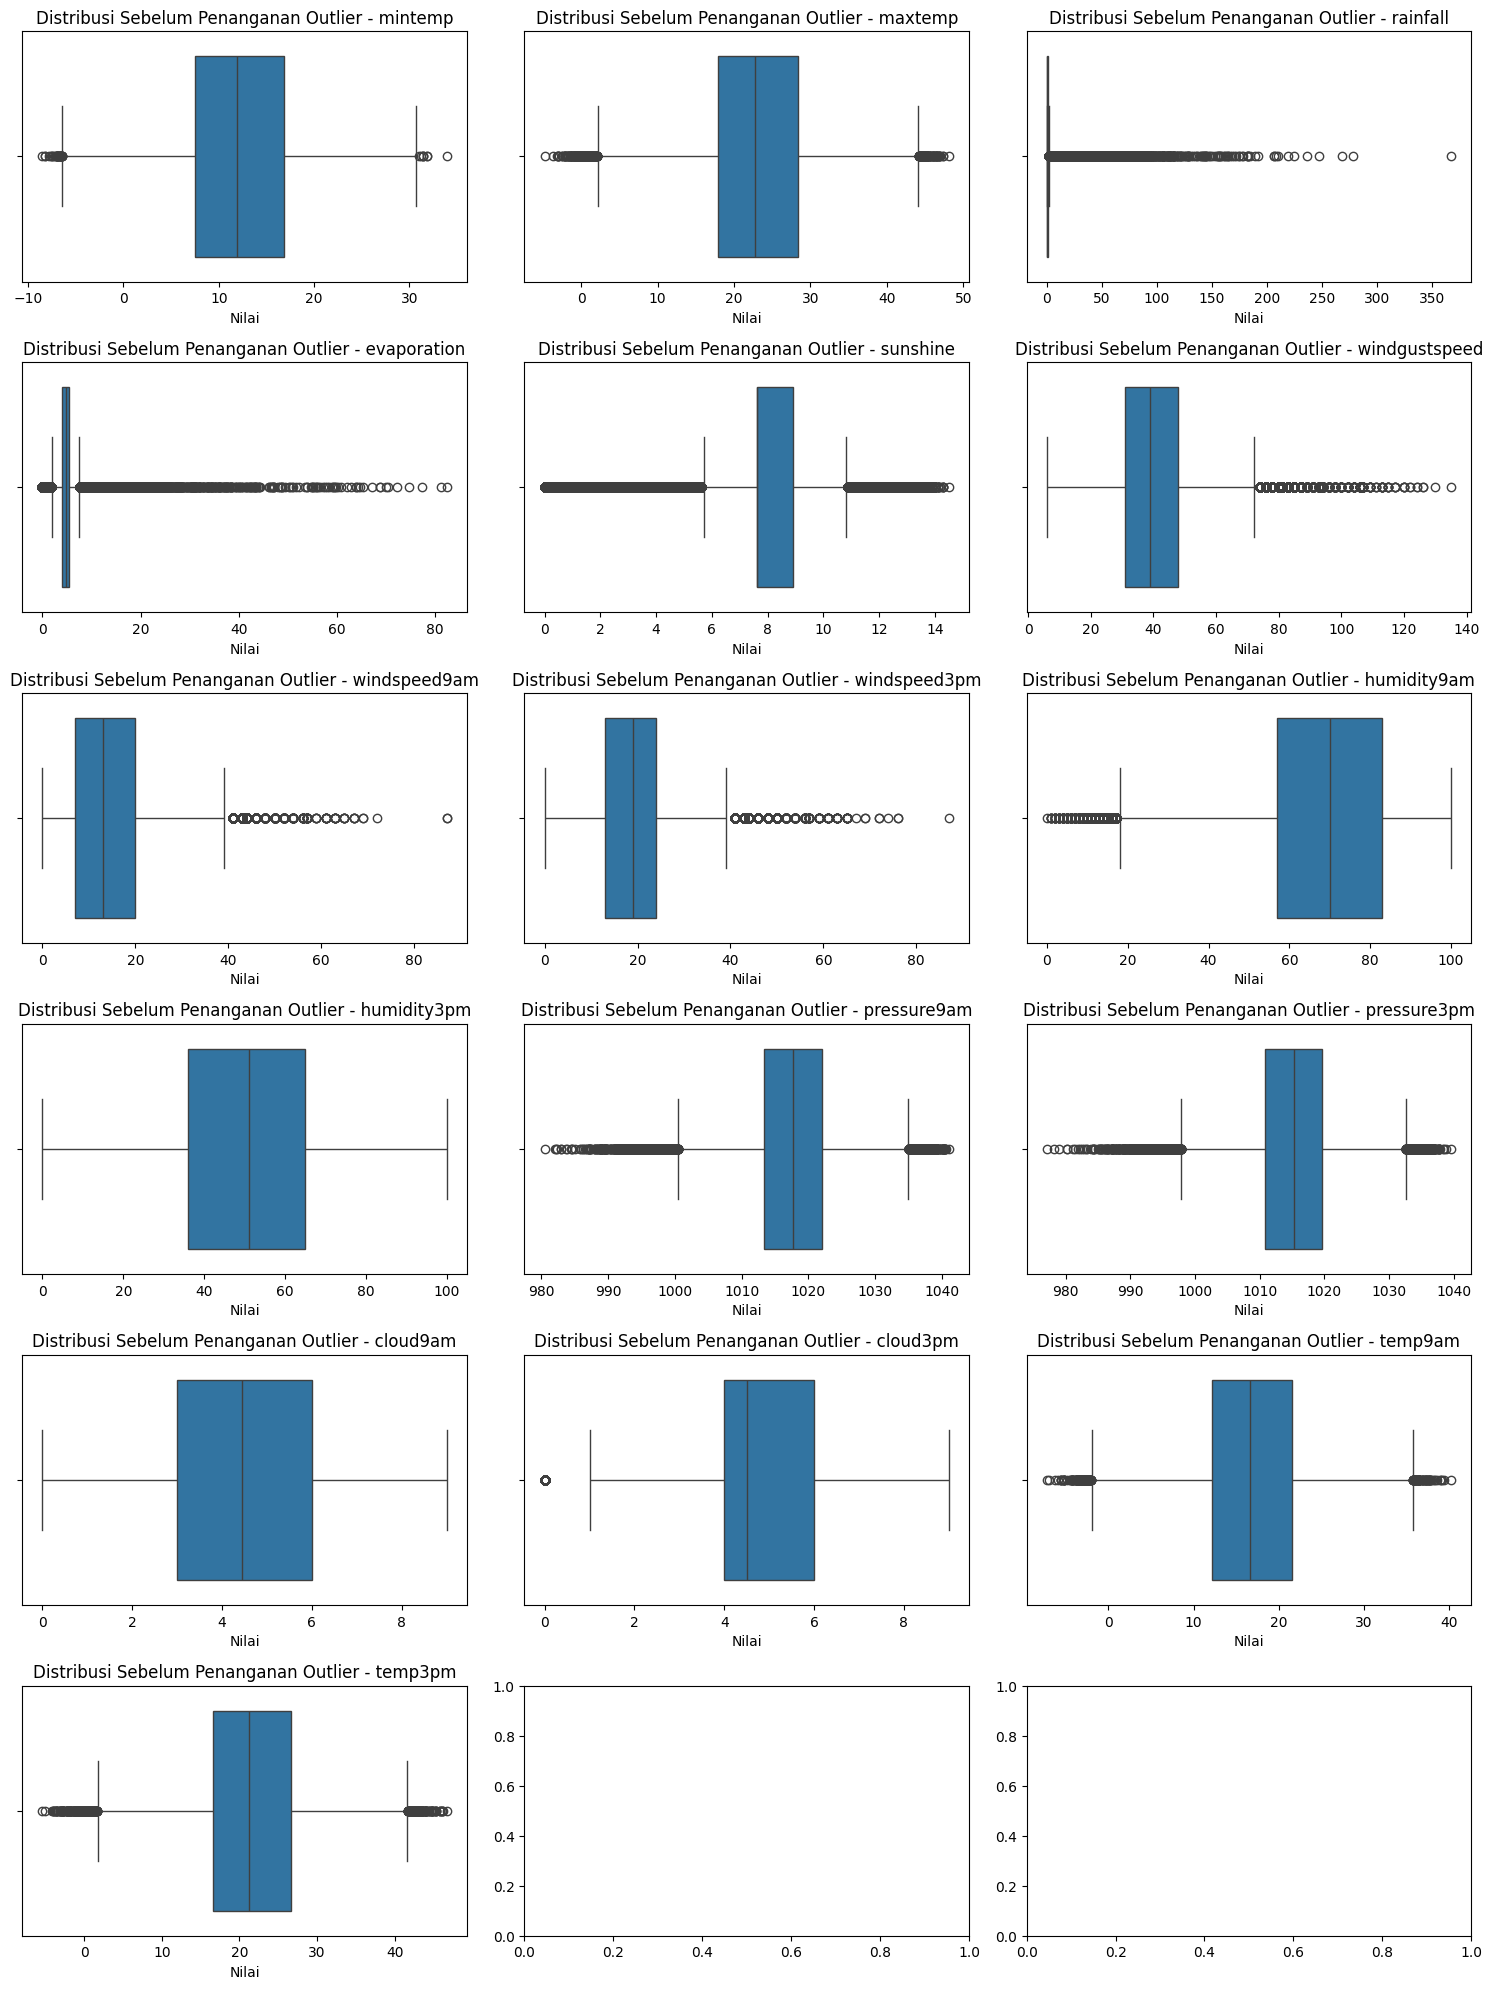

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghapus kolom 'day', 'month', 'year' dari visualisasi
num_col_filtered = [col for col in num_col if col not in ['day', 'month', 'year']]

# Membuat subplots agar visual lebih jelas
fig, axes = plt.subplots(nrows=len(num_col_filtered) // 3 + 1, ncols=3, figsize=(15, 20))

# Menampilkan boxplot untuk setiap kolom numerik yang tersisa
for ax, col in zip(axes.flatten(), num_col_filtered):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f'Distribusi Sebelum Penanganan Outlier - {col}')
    ax.set_xlabel('Nilai')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()


In [ ]:
# Penanganan outlier dengan mengganti nilai batas
for kolom in num_col:
    Q1 = df[kolom].quantile(0.25)
    Q3 = df[kolom].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Ganti outlier dengan nilai batas
    df[kolom] = np.where(df[kolom] < lower_limit, lower_limit, df[kolom])
    df[kolom] = np.where(df[kolom] > upper_limit, upper_limit, df[kolom])


In [ ]:
# Mengecek outlier pada fitur numerik yang tersisa
for kolom in num_col:
    Q1 = df[kolom].quantile(0.25)
    Q3 = df[kolom].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Menampilkan jumlah outlier
    jumlah_outlier = ((df[kolom] < lower_limit) | (df[kolom] > upper_limit)).sum()
    print(f"Jumlah outlier pada kolom {kolom}: {jumlah_outlier}")

Jumlah outlier pada kolom day: 0
Jumlah outlier pada kolom month: 0
Jumlah outlier pada kolom year: 0
Jumlah outlier pada kolom mintemp: 0
Jumlah outlier pada kolom maxtemp: 0
Jumlah outlier pada kolom rainfall: 0
Jumlah outlier pada kolom evaporation: 0
Jumlah outlier pada kolom sunshine: 0
Jumlah outlier pada kolom windgustspeed: 0
Jumlah outlier pada kolom windspeed9am: 0
Jumlah outlier pada kolom windspeed3pm: 0
Jumlah outlier pada kolom humidity9am: 0
Jumlah outlier pada kolom humidity3pm: 0
Jumlah outlier pada kolom pressure9am: 0
Jumlah outlier pada kolom pressure3pm: 0
Jumlah outlier pada kolom cloud9am: 0
Jumlah outlier pada kolom cloud3pm: 0
Jumlah outlier pada kolom temp9am: 0
Jumlah outlier pada kolom temp3pm: 0


In [ ]:
df.head(3)

,day,month,year,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,...,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
0,1.0,12.0,2008.0,Albury,13.4,22.9,0.6,4.8,7.611178,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,2.0,12.0,2008.0,Albury,7.4,25.1,0.0,4.8,7.611178,WNW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,3.0,12.0,2008.0,Albury,12.9,25.7,0.0,4.8,7.611178,WSW,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No


In [ ]:
df.tail(3)

,day,month,year,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,...,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
130061,22.0,6.0,2017.0,Uluru,3.6,25.3,0.0,4.8,7.611178,NNW,...,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,No,No
130062,23.0,6.0,2017.0,Uluru,5.4,26.9,0.0,4.8,7.611178,N,...,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,No,No
130063,24.0,6.0,2017.0,Uluru,7.8,27.0,0.0,4.8,7.611178,SE,...,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,No,No


In [ ]:
df.describe()

,day,month,year,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm
count,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000
mean,15.728403,6.404124,2012.787474,12.123776,23.279362,0.384957,4.803764,7.972080,39.791191,14.150441,18.695139,68.673853,51.013970,1017.680412,1015.271590,4.443008,4.540611,16.945696,21.772047
std,8.797001,3.428395,2.522405,6.430310,7.118353,0.609686,1.642714,1.598944,12.964791,8.586710,8.421945,19.092748,20.846997,6.692811,6.647972,2.254677,2.042659,6.529154,6.968093
min,1.000000,1.000000,2007.000000,-6.450000,2.150000,0.000000,1.900000,5.677944,6.000000,0.000000,0.000000,18.000000,0.000000,1000.500000,997.850000,0.000000,1.000000,-1.900000,1.600000
25%,8.000000,3.000000,2011.000000,7.500000,17.900000,0.000000,4.000000,7.611178,31.000000,7.000000,13.000000,57.000000,36.000000,1013.400000,1010.900000,3.000000,4.000000,12.200000,16.600000
50%,16.000000,6.000000,2013.000000,11.900000,22.800000,0.000000,4.800000,7.611178,39.000000,13.000000,19.000000,70.000000,51.000000,1017.649940,1015.255889,4.447461,4.509930,16.600000,21.250000
75%,23.000000,9.000000,2015.000000,16.800000,28.400000,0.600000,5.400000,8.900000,48.000000,20.000000,24.000000,83.000000,65.000000,1022.000000,1019.600000,6.000000,6.000000,21.600000,26.600000
max,31.000000,12.000000,2017.000000,30.750000,44.150000,1.500000,7.500000,10.833234,73.500000,39.500000,40.500000,100.000000,100.000000,1034.900000,1032.650000,9.000000,9.000000,35.700000,41.600000


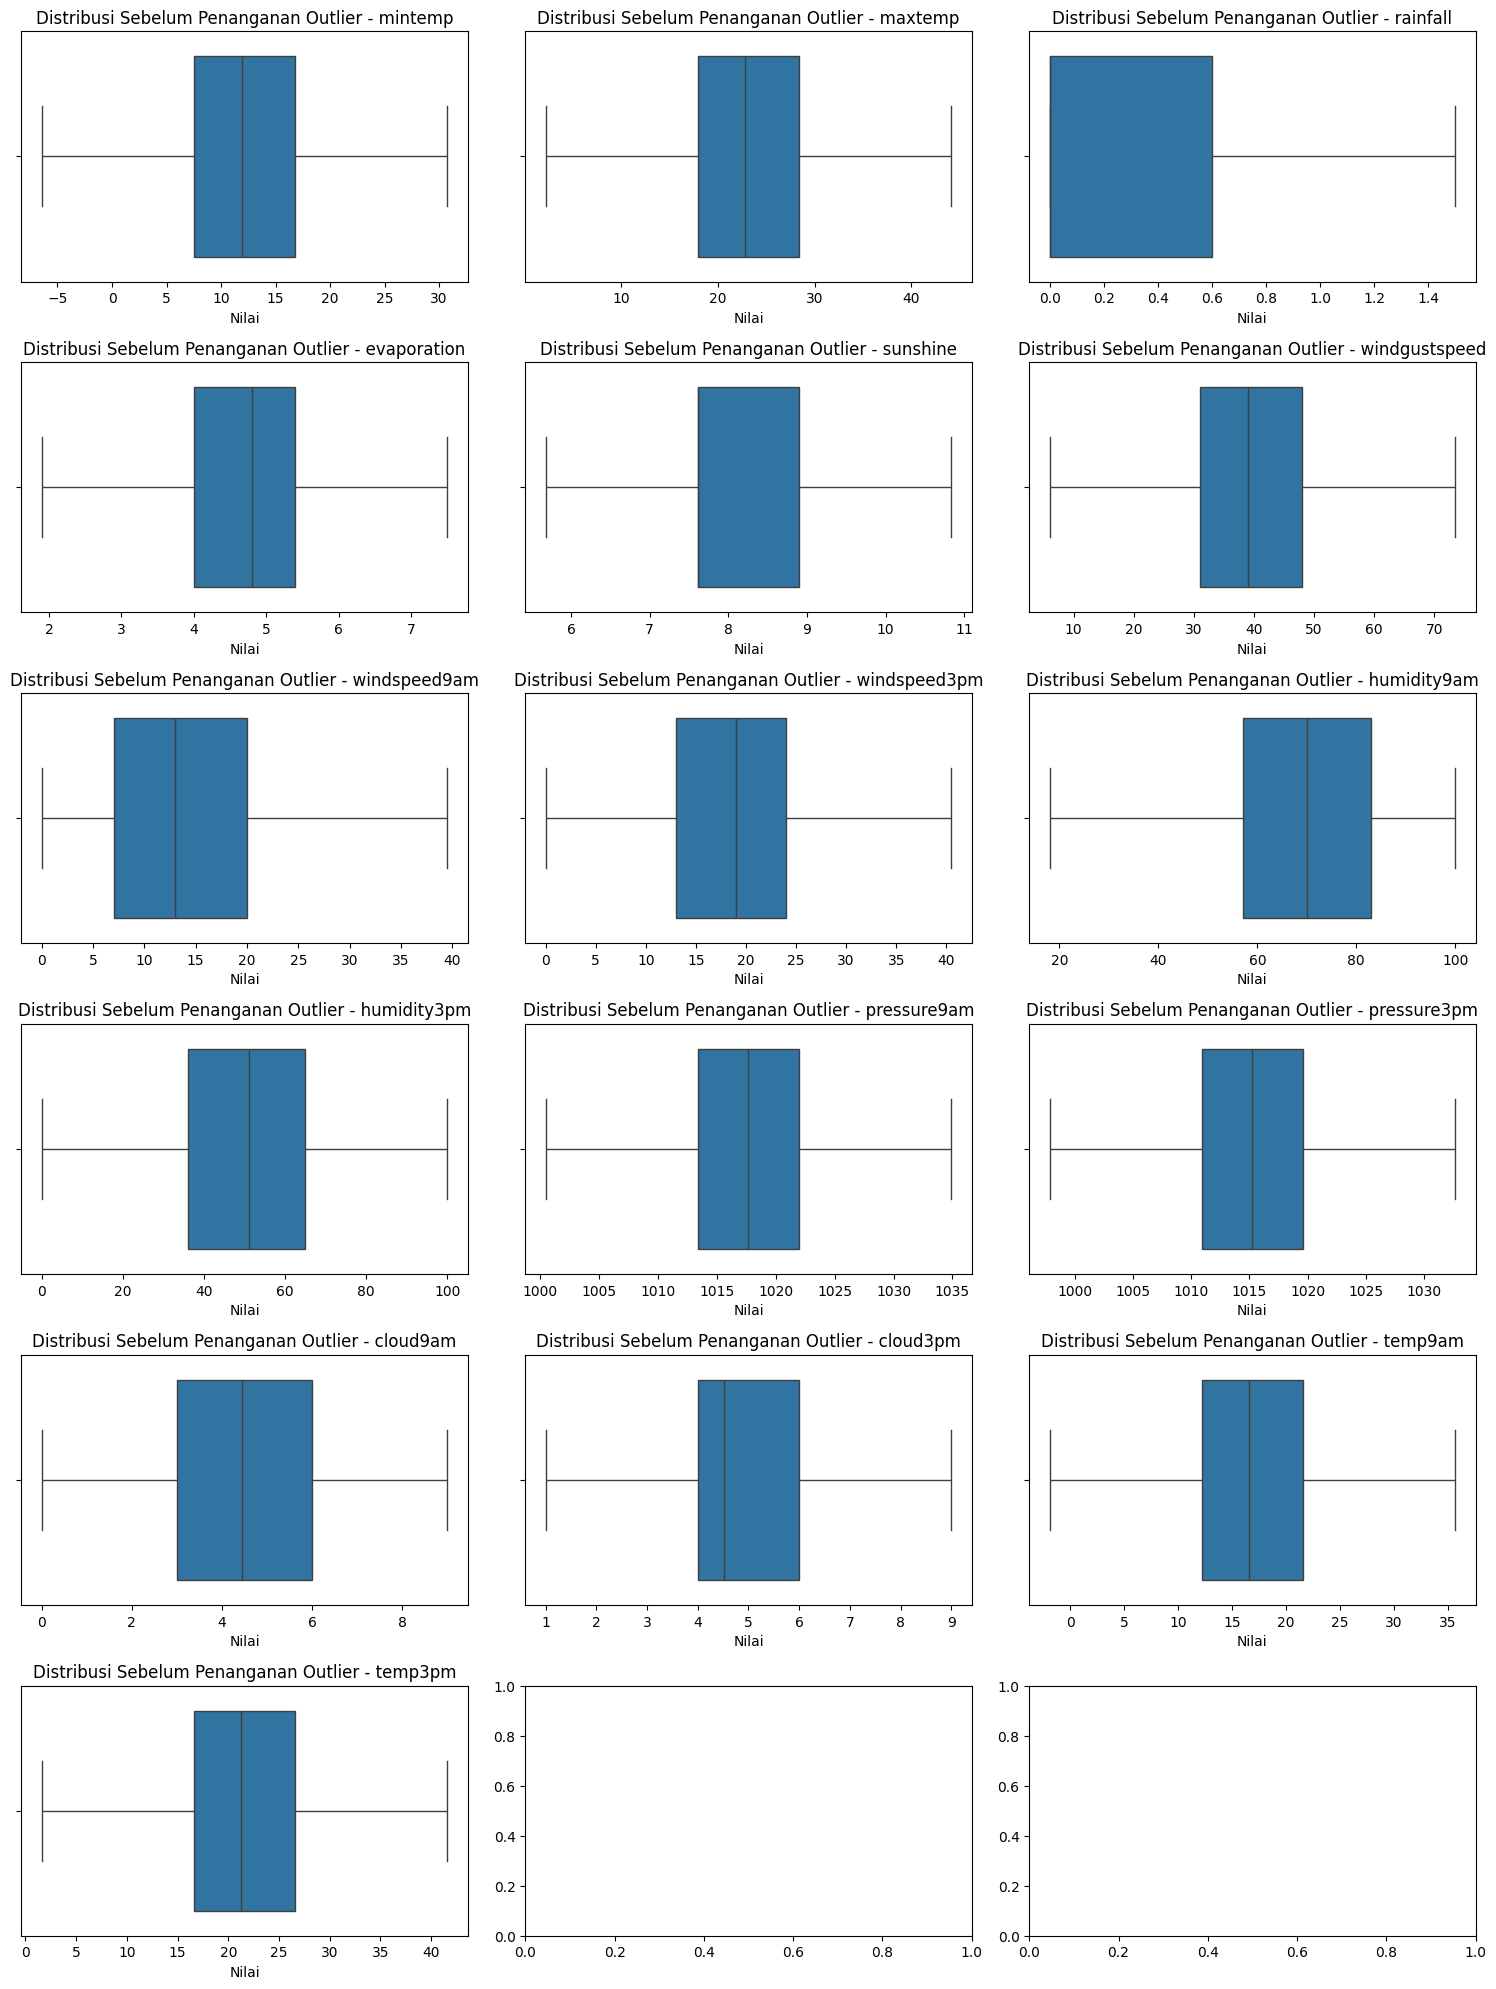

In [ ]:
# Menghapus kolom 'day', 'month', 'year' dari visualisasi
num_col_filtered = [col for col in num_col if col not in ['day', 'month', 'year']]

# Membuat subplots agar visual lebih jelas
fig, axes = plt.subplots(nrows=len(num_col_filtered) // 3 + 1, ncols=3, figsize=(15, 20))

# Menampilkan boxplot untuk setiap kolom numerik yang tersisa
for ax, col in zip(axes.flatten(), num_col_filtered):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f'Distribusi Sebelum Penanganan Outlier - {col}')
    ax.set_xlabel('Nilai')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

# Feature Encoding

In [ ]:
# Tentukan kolom kategori yang ingin ditampilkan
kolom_kategori = ['location', 'windgustdir', 'winddir9am', 'winddir3pm', 'raintoday', 'raintomorrow']

# Tampilkan df.head() hanya untuk kolom kategori
df[kolom_kategori].head()

,location,windgustdir,winddir9am,winddir3pm,raintoday,raintomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No


In [ ]:
df[kolom_kategori].tail()

,location,windgustdir,winddir9am,winddir3pm,raintoday,raintomorrow
130059,Uluru,E,ESE,E,No,No
130060,Uluru,E,SE,ENE,No,No
130061,Uluru,NNW,SE,N,No,No
130062,Uluru,N,SE,WNW,No,No
130063,Uluru,SE,SSE,N,No,No


In [ ]:
for feature in df.columns:
    if df[feature].dtype not in ['int64', 'float64']:    #dtype means datatype
        print(f"{feature}:{df[feature].unique()}")

location:['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'NorahHead'
 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums' 'Walpole'
 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine' 'Uluru']
windgustdir:['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']
winddir9am:['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'SSW' 'N' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']
winddir3pm:['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']
raintoday:['No' 'Yes']
raintomorrow:['No' 'Yes']


In [ ]:
# Menampilkan nilai unik sebelum Label Encoding
print("Nilai unik sebelum encoding:")
for col in ['location', 'windgustdir', 'winddir9am', 'winddir3pm', 'raintoday', 'raintomorrow']:
    print(f"\n{col}:")
    print(df[col].unique())

Nilai unik sebelum encoding:

location:
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'NorahHead'
 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums' 'Walpole'
 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine' 'Uluru']

windgustdir:
['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']

winddir9am:
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'SSW' 'N' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']

winddir3pm:
['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']

raintoday:
['No' 'Yes']

raintomorrow:
['No' 'Yes']


In [ ]:
# Melakukan Label Encoding pada semua fitur yang disebutkan
encoder_dict = {}  # Dictionary untuk menyimpan mapping encoder setiap kolom
for col in ['location', 'windgustdir', 'winddir9am', 'winddir3pm', 'raintoday', 'raintomorrow']:
    # Inisialisasi LabelEncoder dan fitting
    lbl = LabelEncoder()
    lbl.fit(df[col])
    df[col] = lbl.transform(df[col])  # Transformasi kolom menjadi label numerik

    # Simpan encoder untuk melihat mapping kategori ke label
    encoder_dict[col] = dict(zip(lbl.classes_, lbl.transform(lbl.classes_)))

In [ ]:
# Menampilkan nilai unik setelah Label Encoding
print("\nNilai unik sesudah encoding (dalam format label numerik):")
for col in ['location', 'windgustdir', 'winddir9am', 'winddir3pm', 'raintoday', 'raintomorrow']:
    print(f"\n{col}:")
    print(df[col].unique())



Nilai unik sesudah encoding (dalam format label numerik):

location:
[ 1  3  9 10 20 24 25 28 32 35 36 40 43 45  8 38 22  4  5 33 18 17 19 23
 31 42 11  6  7 13 37  0 21 26 46 44 27 30 29 34 41 14 16  2 12 15 39]

windgustdir:
[13 14 15  4  6  3  5 12  1 10  8  7  9  2  0 11]

winddir9am:
[13  6  9  1 12 10  8  4 11  3 15  2  0  7 14  5]

winddir3pm:
[14 15  0  7 13 10  2  1  6 11 12  9  3  8  5  4]

raintoday:
[0 1]

raintomorrow:
[0 1]


In [ ]:
# Tentukan kolom kategori yang ingin ditampilkan
kolom_kategori = ['location', 'windgustdir', 'winddir9am', 'winddir3pm', 'raintoday', 'raintomorrow']

# Tampilkan df.head() hanya untuk kolom kategori
df[kolom_kategori].head()


,location,windgustdir,winddir9am,winddir3pm,raintoday,raintomorrow
0,1,13,13,14,0,0
1,1,14,6,15,0,0
2,1,15,13,15,0,0
3,1,4,9,0,0,0
4,1,13,1,7,0,0


In [ ]:
df[kolom_kategori].tail()

,location,windgustdir,winddir9am,winddir3pm,raintoday,raintomorrow
130059,39,0,2,0,0,0
130060,39,0,9,1,0,0
130061,39,6,9,3,0,0
130062,39,3,9,14,0,0
130063,39,9,10,3,0,0


In [ ]:
# Menampilkan mapping kategori ke label numerik
print("\nMapping kategori ke label numerik:")
for col, mapping in encoder_dict.items():
    print(f"\n{col} mapping:")
    print(mapping)


Mapping kategori ke label numerik:

location mapping:
{'Adelaide': 0, 'Albury': 1, 'AliceSprings': 2, 'BadgerysCreek': 3, 'Ballarat': 4, 'Bendigo': 5, 'Brisbane': 6, 'Cairns': 7, 'Canberra': 8, 'Cobar': 9, 'CoffsHarbour': 10, 'Dartmoor': 11, 'Darwin': 12, 'GoldCoast': 13, 'Hobart': 14, 'Katherine': 15, 'Launceston': 16, 'Melbourne': 17, 'MelbourneAirport': 18, 'Mildura': 19, 'Moree': 20, 'MountGambier': 21, 'MountGinini': 22, 'Nhil': 23, 'NorahHead': 24, 'NorfolkIsland': 25, 'Nuriootpa': 26, 'PearceRAAF': 27, 'Penrith': 28, 'Perth': 29, 'PerthAirport': 30, 'Portland': 31, 'Richmond': 32, 'Sale': 33, 'SalmonGums': 34, 'Sydney': 35, 'SydneyAirport': 36, 'Townsville': 37, 'Tuggeranong': 38, 'Uluru': 39, 'WaggaWagga': 40, 'Walpole': 41, 'Watsonia': 42, 'Williamtown': 43, 'Witchcliffe': 44, 'Wollongong': 45, 'Woomera': 46}

windgustdir mapping:
{'E': 0, 'ENE': 1, 'ESE': 2, 'N': 3, 'NE': 4, 'NNE': 5, 'NNW': 6, 'NW': 7, 'S': 8, 'SE': 9, 'SSE': 10, 'SSW': 11, 'SW': 12, 'W': 13, 'WNW': 14, 'WS

In [ ]:
# Menampilkan mapping kategori ke label numerik dengan alignment
print("\nMapping kategori ke label numerik:")
for col, mapping in encoder_dict.items():
    print(f"\n{col} mapping:")
    # Format output untuk location agar lebih rapi
    if col == "location":
        # Membatasi panjang karakter per baris untuk location
        line_length = 70  # Batasan panjang per baris
        current_line = ""  # Menyimpan baris yang sedang dibuat
        for key, value in mapping.items():
            # Menambah entry mapping ke current line
            entry = f"'{key}': {value}, "
            if len(current_line) + len(entry) > line_length:
                print(current_line)
                current_line = entry
            else:
                current_line += entry
        # Cetak sisa baris terakhir
        if current_line:
            print(current_line)
    else:
        # Cetak mapping untuk kolom lain seperti biasa
        print(mapping)



Mapping kategori ke label numerik:

location mapping:
'Adelaide': 0, 'Albury': 1, 'AliceSprings': 2, 'BadgerysCreek': 3, 
'Ballarat': 4, 'Bendigo': 5, 'Brisbane': 6, 'Cairns': 7, 
'Canberra': 8, 'Cobar': 9, 'CoffsHarbour': 10, 'Dartmoor': 11, 
'Darwin': 12, 'GoldCoast': 13, 'Hobart': 14, 'Katherine': 15, 
'Launceston': 16, 'Melbourne': 17, 'MelbourneAirport': 18, 
'Mildura': 19, 'Moree': 20, 'MountGambier': 21, 'MountGinini': 22, 
'Nhil': 23, 'NorahHead': 24, 'NorfolkIsland': 25, 'Nuriootpa': 26, 
'PearceRAAF': 27, 'Penrith': 28, 'Perth': 29, 'PerthAirport': 30, 
'Portland': 31, 'Richmond': 32, 'Sale': 33, 'SalmonGums': 34, 
'Sydney': 35, 'SydneyAirport': 36, 'Townsville': 37, 
'Tuggeranong': 38, 'Uluru': 39, 'WaggaWagga': 40, 'Walpole': 41, 
'Watsonia': 42, 'Williamtown': 43, 'Witchcliffe': 44, 
'Wollongong': 45, 'Woomera': 46, 

windgustdir mapping:
{'E': 0, 'ENE': 1, 'ESE': 2, 'N': 3, 'NE': 4, 'NNE': 5, 'NNW': 6, 'NW': 7, 'S': 8, 'SE': 9, 'SSE': 10, 'SSW': 11, 'SW': 12, 'W': 13, 'W

In [ ]:
df.head()

,day,month,year,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,...,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
0,1.0,12.0,2008.0,1,13.4,22.9,0.6,4.8,7.611178,13,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,2.0,12.0,2008.0,1,7.4,25.1,0.0,4.8,7.611178,14,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,3.0,12.0,2008.0,1,12.9,25.7,0.0,4.8,7.611178,15,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,4.0,12.0,2008.0,1,9.2,28.0,0.0,4.8,7.611178,4,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,5.0,12.0,2008.0,1,17.5,32.3,1.0,4.8,7.611178,13,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0


# Hitung Scaling Manual

In [ ]:
# Menghitung jumlah sampel pada masing-masing kelas
count_no = df[df['raintomorrow'] == 0].shape[0]
count_yes = df[df['raintomorrow'] == 1].shape[0]

In [ ]:
count_no

101879

In [ ]:
count_yes

28185

In [ ]:
mean_rainfall_no = df[df['raintomorrow'] == 0]['rainfall'].mean()
mean_rainfall_yes = df[df['raintomorrow'] == 1]['rainfall'].mean()
mean_rainfall_overall = df['rainfall'].mean()

In [ ]:
df[df['raintomorrow'] == 1]['rainfall']

,rainfall
8,0.0
10,0.0
11,1.5
12,1.5
14,0.0
...,...
129931,0.4
129995,0.0
129996,1.5
129997,1.5


In [ ]:
df['rainfall'].unique()

array([0.6, 0. , 1. , 0.2, 1.4, 1.5, 1.2, 0.8, 0.4, 1.3, 0.5, 0.9, 0.3,
       0.1, 0.7, 1.1])

In [ ]:
mean_rainfall_no

0.2798761275630895

In [ ]:
mean_rainfall_yes

0.7647897817988291

In [ ]:
mean_rainfall_overall

0.3849574055849428

In [ ]:
# Menghitung SSB (Sum of Squares Between)
SSB = (count_no * (mean_rainfall_no - mean_rainfall_overall)**2) + \
      (count_yes * (mean_rainfall_yes - mean_rainfall_overall)**2)

# Menghitung SSW (Sum of Squares Within)
# Varians dalam kelompok No
rainfall_no = df[df['raintomorrow'] == 0]['rainfall']
SSW_no = sum((rainfall_no - mean_rainfall_no)**2)

# Varians dalam kelompok Yes
rainfall_yes = df[df['raintomorrow'] == 1]['rainfall']
SSW_yes = sum((rainfall_yes - mean_rainfall_yes)**2)

# Total SSW
SSW = SSW_no + SSW_yes

# Menampilkan hasil
SSB, SSW, SSW_no, SSW_yes


(5191.279747839935, 43155.27941614961, 29321.562036698186, 13833.717379451426)

# Pemisahan Fitur dan Variabel Target

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130064 entries, 0 to 130063
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   day            130064 non-null  float64
 1   month          130064 non-null  float64
 2   year           130064 non-null  float64
 3   location       130064 non-null  int64  
 4   mintemp        130064 non-null  float64
 5   maxtemp        130064 non-null  float64
 6   rainfall       130064 non-null  float64
 7   evaporation    130064 non-null  float64
 8   sunshine       130064 non-null  float64
 9   windgustdir    130064 non-null  int64  
 10  windgustspeed  130064 non-null  float64
 11  winddir9am     130064 non-null  int64  
 12  winddir3pm     130064 non-null  int64  
 13  windspeed9am   130064 non-null  float64
 14  windspeed3pm   130064 non-null  float64
 15  humidity9am    130064 non-null  float64
 16  humidity3pm    130064 non-null  float64
 17  pressure9am    130064 non-nul

In [ ]:
# Memisahkan target variable (y) dan fitur (X)
X = df.drop(columns=['raintomorrow'])  # Menghapus kolom target dari dataset
y = df['raintomorrow']  # Kolom target (y)

# Scaling Data

In [ ]:
from sklearn.preprocessing import StandardScaler

# Melakukan standardisasi pada fitur (X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Mengubah X_scaled menjadi dataframe
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Menampilkan dataframe
X_scaled_df.head()


,day,month,year,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,...,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday
0,-1.674259,1.632221,-1.897987,-1.583676,0.198471,-0.053294,0.352712,-0.002291,-0.225714,1.132295,...,0.629888,0.121835,-1.391763,-1.491219,-1.229190,1.577612,-0.015020,-0.006999,0.004012,-0.532274
1,-1.560584,1.632221,-1.897987,-1.583676,-0.734614,0.255768,-0.631406,-0.002291,-0.225714,1.346979,...,0.392412,-1.292320,-1.247857,-1.057917,-1.123894,0.001975,-0.015020,0.038949,0.362791,-0.532274
2,-1.446908,1.632221,-1.897987,-1.583676,0.120714,0.340057,-0.631406,-0.002291,-0.225714,1.561663,...,0.867364,-1.606577,-1.008013,-1.506161,-0.988514,0.001975,-1.243781,0.620956,0.204928,-0.532274
3,-1.333233,1.632221,-1.897987,-1.583676,-0.454688,0.663167,-0.631406,-0.002291,-0.225714,-0.799863,...,-1.151180,-1.239944,-1.679575,-0.012015,-0.371782,0.001975,-0.015020,0.176793,0.678517,-0.532274
4,-1.219557,1.632221,-1.897987,-1.583676,0.836079,1.267242,1.008790,-0.002291,-0.225714,1.132295,...,0.154936,0.697972,-0.864107,-1.028034,-1.394655,1.134088,1.693578,0.130845,1.137755,-0.532274


In [ ]:
X_scaled_df.tail()

,day,month,year,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,...,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday
130059,0.485576,-0.117876,1.67005,1.186345,-1.341119,-0.207825,-0.631406,-0.002291,-0.225714,-1.658600,...,-0.676229,-0.506679,-1.151920,1.048829,0.891766,0.001975,-0.015020,-1.155697,-0.125149,-0.532274
130060,0.599252,-0.117876,1.67005,1.186345,-1.449979,0.016947,-0.631406,-0.002291,-0.225714,-1.658600,...,-0.913704,-0.925688,-1.295826,1.033888,0.756385,0.001975,-0.015020,-1.048485,0.090119,-0.532274
130061,0.712927,-0.117876,1.67005,1.186345,-1.325567,0.283864,-0.631406,-0.002291,-0.225714,-0.370495,...,-1.151180,-0.663807,-1.439732,0.869531,0.575879,0.001975,-0.015020,-0.925957,0.391494,-0.532274
130062,0.826603,-0.117876,1.67005,1.186345,-1.045642,0.508636,-0.631406,-0.002291,-0.225714,-1.014547,...,-1.151180,-0.820935,-1.295826,0.495995,0.229907,0.001975,-0.015020,-0.680902,0.621113,-0.532274
130063,0.940278,-0.117876,1.67005,1.186345,-0.672408,0.522684,-0.631406,-0.002291,-0.225714,0.273558,...,-1.388656,-0.925688,-1.295826,0.256932,0.184780,-0.640009,-1.243781,-0.282686,0.606761,-0.532274


# Hitung Seleksi Fitur - Seluruh F-value ditampilkan  

In [ ]:
from sklearn.feature_selection import f_classif
import pandas as pd
import os

# Menggunakan dataset hasil scaling (X_scaled_df) dan target (y)
# X_scaled_df adalah dataset yang telah di-scaling, y adalah target

# Menghitung F-value dan p-value
f_values, p_values = f_classif(X_scaled_df, y)

# Membuat dataframe untuk F-value dan p-value
f_value_df = pd.DataFrame({
    'Feature': X_scaled_df.columns,
    'F-value': f_values,
    'P-value': p_values
})

# Menambahkan ranking berdasarkan F-value (dari terbesar ke terkecil)
f_value_df['Rank'] = f_value_df['F-value'].rank(ascending=False)

# Mengurutkan berdasarkan ranking
f_value_df = f_value_df.sort_values(by='F-value', ascending=False).reset_index(drop=True)

# Menampilkan 15 fitur terbaik
print(f_value_df.head(15))


          Feature       F-value        P-value  Rank
0     humidity3pm  32978.373721   0.000000e+00   1.0
1        rainfall  15645.553353   0.000000e+00   2.0
2       raintoday  13791.071228   0.000000e+00   3.0
3        sunshine  13249.466595   0.000000e+00   4.0
4        cloud3pm  13038.797509   0.000000e+00   5.0
5     humidity9am   9226.754907   0.000000e+00   6.0
6        cloud9am   8898.236602   0.000000e+00   7.0
7     pressure9am   7545.708639   0.000000e+00   8.0
8   windgustspeed   7213.574505   0.000000e+00   9.0
9     pressure3pm   6397.094280   0.000000e+00  10.0
10        temp3pm   4930.920344   0.000000e+00  11.0
11        maxtemp   3297.708153   0.000000e+00  12.0
12    evaporation   1260.582245  8.698929e-275  13.0
13   windspeed9am   1125.677824  9.808831e-246  14.0
14   windspeed3pm   1068.062583  2.566092e-233  15.0


In [ ]:
print(f_value_df)

          Feature       F-value        P-value  Rank
0     humidity3pm  32978.373721   0.000000e+00   1.0
1        rainfall  15645.553353   0.000000e+00   2.0
2       raintoday  13791.071228   0.000000e+00   3.0
3        sunshine  13249.466595   0.000000e+00   4.0
4        cloud3pm  13038.797509   0.000000e+00   5.0
5     humidity9am   9226.754907   0.000000e+00   6.0
6        cloud9am   8898.236602   0.000000e+00   7.0
7     pressure9am   7545.708639   0.000000e+00   8.0
8   windgustspeed   7213.574505   0.000000e+00   9.0
9     pressure3pm   6397.094280   0.000000e+00  10.0
10        temp3pm   4930.920344   0.000000e+00  11.0
11        maxtemp   3297.708153   0.000000e+00  12.0
12    evaporation   1260.582245  8.698929e-275  13.0
13   windspeed9am   1125.677824  9.808831e-246  14.0
14   windspeed3pm   1068.062583  2.566092e-233  15.0
15        mintemp   1003.602306  2.039071e-219  16.0
16    windgustdir    287.348460   2.206055e-64  17.0
17     winddir9am    153.994164   2.432434e-35

# Hitung Seleksi Fitur Manual

In [ ]:
# Menghitung rata-rata keseluruhan
mean_rainfall_overall = X_scaled_df['rainfall'].mean()

# Menghitung rata-rata dalam tiap kelompok (No dan Yes)
mean_rainfall_no = X_scaled_df[y == 0]['rainfall'].mean()
mean_rainfall_yes = X_scaled_df[y == 1]['rainfall'].mean()

# Menghitung SSW (Sum of Squares Within)
SSW_no = ((X_scaled_df[y == 0]['rainfall'] - mean_rainfall_no) ** 2).sum()
SSW_yes = ((X_scaled_df[y == 1]['rainfall'] - mean_rainfall_yes) ** 2).sum()
SSW_total = SSW_no + SSW_yes

# Menghitung SSB (Sum of Squares Between)
count_no = (y == 0).sum()
count_yes = (y == 1).sum()
SSB = count_no * (mean_rainfall_no - mean_rainfall_overall) ** 2 + \
      count_yes * (mean_rainfall_yes - mean_rainfall_overall) ** 2

# Menghitung F-Value
F_value = SSB / (SSW_total / (len(y) - 2))

# Menampilkan hasil
print(f"SSW No: {SSW_no:.4f}")
print(f"SSW Yes: {SSW_yes:.4f}")
print(f"SSW Total: {SSW_total:.4f}")
print(f"SSB: {SSB:.4f}")
print(f"F-Value: {F_value:.4f}")


SSW No: 78882.1316
SSW Yes: 37216.0635
SSW Total: 116098.1952
SSB: 13965.8048
F-Value: 15645.5534


In [ ]:
count_no

101879

In [ ]:
count_yes

28185

In [ ]:
mean_rainfall_no

-0.1723538995583995

In [ ]:
mean_rainfall_yes

0.6229995718683764

In [ ]:
mean_rainfall_overall

3.49633527253094e-17

In [ ]:
# Menghitung jumlah sampel total (N)
N = len(y)
print(f"Jumlah total sampel (N): {N}")

# Menghitung jumlah kelas atau kategori dalam variabel target (K)
K = y.nunique()
print(f"Jumlah kelas atau kategori (K): {K}")


Jumlah total sampel (N): 130064
Jumlah kelas atau kategori (K): 2


# Seleksi Fitur

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

fs = SelectKBest(score_func=f_classif, k=15)
# apply feature selection
X_selected = fs.fit_transform(X_scaled_df, y)
print(X_selected.shape)

(130064, 15)


In [ ]:
# Mendapatkan nama kolom yang dipilih
selected_columns = fs.get_support(indices=True)
X_selected_df = pd.DataFrame(X_selected, columns=X_scaled_df.columns[selected_columns])

# Menampilkan beberapa baris dari dataframe yang baru
X_selected_df.head()

,maxtemp,rainfall,evaporation,sunshine,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp3pm,raintoday
0,-0.053294,0.352712,-0.002291,-0.225714,0.324635,0.681237,0.629888,0.121835,-1.391763,-1.491219,-1.229190,1.577612,-0.015020,0.004012,-0.532274
1,0.255768,-0.631406,-0.002291,-0.225714,0.324635,-1.182115,0.392412,-1.292320,-1.247857,-1.057917,-1.123894,0.001975,-0.015020,0.362791,-0.532274
2,0.340057,-0.631406,-0.002291,-0.225714,0.478900,0.564777,0.867364,-1.606577,-1.008013,-1.506161,-0.988514,0.001975,-1.243781,0.204928,-0.532274
3,0.663167,-0.631406,-0.002291,-0.225714,-1.218011,-0.366899,-1.151180,-1.239944,-1.679575,-0.012015,-0.371782,0.001975,-0.015020,0.678517,-0.532274
4,1.267242,1.008790,-0.002291,-0.225714,0.093238,-0.832737,0.154936,0.697972,-0.864107,-1.028034,-1.394655,1.134088,1.693578,1.137755,-0.532274


In [ ]:
X_selected_df.tail()

,maxtemp,rainfall,evaporation,sunshine,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp3pm,raintoday
130059,-0.207825,-0.631406,-0.002291,-0.225714,-0.678085,0.098939,-0.676229,-0.506679,-1.151920,1.048829,0.891766,0.001975,-0.015020,-0.125149,-0.532274
130060,0.016947,-0.631406,-0.002291,-0.225714,-0.678085,-0.133980,-0.913704,-0.925688,-1.295826,1.033888,0.756385,0.001975,-0.015020,0.090119,-0.532274
130061,0.283864,-0.631406,-0.002291,-0.225714,-1.372275,-0.133980,-1.151180,-0.663807,-1.439732,0.869531,0.575879,0.001975,-0.015020,0.391494,-0.532274
130062,0.508636,-0.631406,-0.002291,-0.225714,-0.215291,-0.599818,-1.151180,-0.820935,-1.295826,0.495995,0.229907,0.001975,-0.015020,0.621113,-0.532274
130063,0.522684,-0.631406,-0.002291,-0.225714,-0.909481,-0.133980,-1.388656,-0.925688,-1.295826,0.256932,0.184780,-0.640009,-1.243781,0.606761,-0.532274


# Handling Imbalance Dataset

In [ ]:
df.raintomorrow.value_counts()

,count
raintomorrow,
0,101879
1,28185


<ipython-input-65-272e04371b58>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x=y, kind='count', palette=colors)


<Figure size 800x500 with 0 Axes>

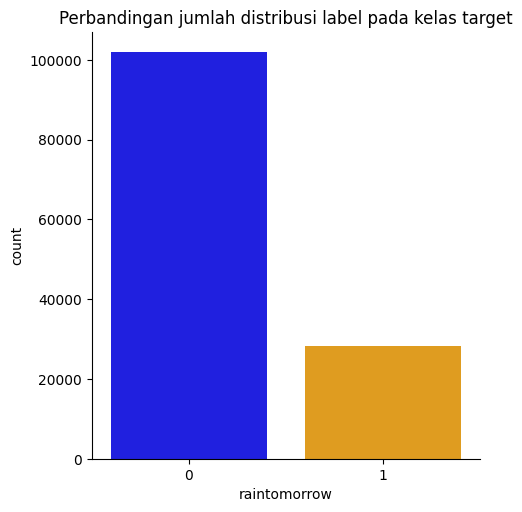

In [ ]:
# Visualisasi persebaran label kelas pada variabel target sebelum dilakukan balancing
colors = ["blue", "orange"]
plt.figure(figsize=(8, 5))
sns.catplot(data=df, x=y, kind='count', palette=colors)
plt.title("Perbandingan jumlah distribusi label pada kelas target")
plt.show()

In [ ]:
# Initialize the Random Over-Sampler
ros = RandomOverSampler(random_state=42)

# Fit the over-sampler to the training data
X_resampled, y_resampled = ros.fit_resample(X_selected_df, y)

In [ ]:
# Cek persebaran data target setelah oversampling
print("Persebaran data setelah oversampling:")
print(y_resampled.value_counts())

Persebaran data setelah oversampling:
raintomorrow
0    101879
1    101879
Name: count, dtype: int64


<ipython-input-68-7703b22d99c2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x=y_resampled, kind='count', palette=colors)


<Figure size 800x500 with 0 Axes>

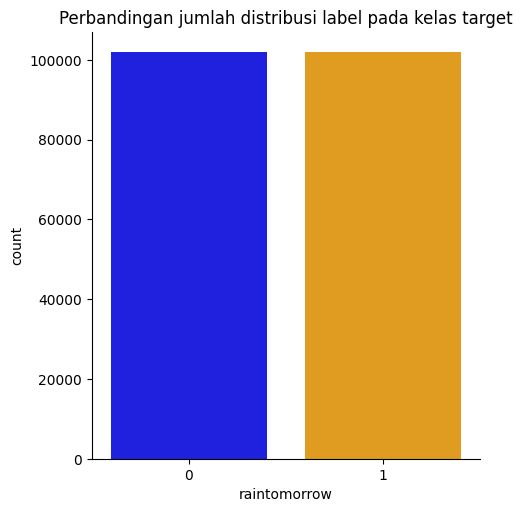

In [ ]:
# Visualisasi persebaran label kelas pada variabel target setelah dilakukan balancing
colors = ["blue", "orange"]
plt.figure(figsize=(8, 5))
sns.catplot(data=df, x=y_resampled, kind='count', palette=colors)
plt.title("Perbandingan jumlah distribusi label pada kelas target")
plt.show()

# Pembangunan Model Klasifikasi

## 1. PCA - Naive Bayes

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Penggunaan reduksi dimensi dengan PCA **sebelum** train-test split
# Tentukan proporsi varians yang diinginkan
n_components_list = [0.6, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 0.98]

# Loop through each value of n_components
for n_components in n_components_list:
    # Lakukan PCA pada keseluruhan data sebelum melakukan train-test split
    if isinstance(n_components, float):
        pca = PCA(n_components=n_components)  # Gunakan explained variance ratio
    else:
        # Gunakan jumlah komponen tertentu tapi tidak boleh melebihi jumlah fitur atau sampel
        pca = PCA(n_components=min(n_components, X_resampled.shape[1]))

    # Terapkan PCA pada keseluruhan data
    X_resampled_pca = pca.fit_transform(X_resampled)

    # Split data yang sudah direduksi dimensi menggunakan PCA
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
        X_resampled_pca, y_resampled, test_size=0.2, random_state=42
    )

    # Train Naive Bayes Model dengan data yang sudah direduksi dimensi
    model_nb_pca = GaussianNB()
    model_nb_pca.fit(X_train_pca, y_train_pca)

    # Evaluate Model
    y_test_pred_pca = model_nb_pca.predict(X_test_pca)

    # Hitung metrik evaluasi
    test_accuracy_pca = accuracy_score(y_test_pca, y_test_pred_pca)
    f1_score_pca = f1_score(y_test_pca, y_test_pred_pca)
    precision_pca = precision_score(y_test_pca, y_test_pred_pca)
    recall_pca = recall_score(y_test_pca, y_test_pred_pca)

    # Print Hasil
    print(f"\nResults for n_components = {n_components}:")
    print(f"Test Accuracy: {test_accuracy_pca}")
    print(f"F1 Score: {f1_score_pca}")
    print(f"Precision: {precision_pca}")
    print(f"Recall: {recall_pca}")
    print(f"Number of Components: {X_train_pca.shape[1]}")

    # Jika n_components berupa float, cetak juga variance ratio
    if isinstance(n_components, float):
        print(f"Explained variance ratio: {sum(pca.explained_variance_ratio_):.4f}")



Results for n_components = 0.6:
Test Accuracy: 0.7434236356497841
F1 Score: 0.7349825112789578
Precision: 0.7607030430220357
Recall: 0.7109443954104149
Number of Components: 3
Explained variance ratio: 0.6296

Results for n_components = 0.65:
Test Accuracy: 0.7490429917550059
F1 Score: 0.7508344499939091
Precision: 0.7461624134424483
Recall: 0.7555653623614789
Number of Components: 4
Explained variance ratio: 0.7273

Results for n_components = 0.7:
Test Accuracy: 0.7490429917550059
F1 Score: 0.7508344499939091
Precision: 0.7461624134424483
Recall: 0.7555653623614789
Number of Components: 4
Explained variance ratio: 0.7273

Results for n_components = 0.75:
Test Accuracy: 0.7503926187671771
F1 Score: 0.7527947895401964
Precision: 0.746265780090585
Recall: 0.7594390507011867
Number of Components: 5
Explained variance ratio: 0.7937

Results for n_components = 0.8:
Test Accuracy: 0.7555457400863761
F1 Score: 0.7578512396694215
Precision: 0.7514219608599249
Recall: 0.7643914876924586
Number

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Penggunaan reduksi dimensi dengan PCA **sebelum** train-test split
# Tentukan proporsi varians yang diinginkan
n_components_list = [0.6, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 0.98]

# Loop through each value of n_components
for n_components in n_components_list:
    # Lakukan PCA pada keseluruhan data sebelum melakukan train-test split
    pca = PCA(n_components=n_components)

    # Terapkan PCA pada keseluruhan data
    X_resampled_pca = pca.fit_transform(X_resampled)

    # Split data yang sudah direduksi dimensi menggunakan PCA
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
        X_resampled_pca, y_resampled, test_size=0.2, random_state=42
    )

    # Train Naive Bayes Model dengan data yang sudah direduksi dimensi
    model_nb_pca = GaussianNB()
    model_nb_pca.fit(X_train_pca, y_train_pca)

    # Evaluate Model
    y_test_pred_pca = model_nb_pca.predict(X_test_pca)

    # Hitung confusion matrix
    cm = confusion_matrix(y_test_pca, y_test_pred_pca)
    print(f"\nConfusion Matrix for n_components = {n_components}:\n", cm)

    # Hitung metrik evaluasi dari confusion matrix
    tn, fp, fn, tp = cm.ravel()

    # Perhitungan akurasi, presisi, recall, dan F1-Score dari confusion matrix
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    # Print hasil evaluasi
    print(f"\nResults for n_components = {n_components}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Print Jumlah Komponen
    print(f"Number of Components: {X_train_pca.shape[1]}")

    # Jika n_components berupa float, cetak juga variance ratio
    if isinstance(n_components, float):
        print(f"Explained variance ratio: {sum(pca.explained_variance_ratio_):.4f}")



Confusion Matrix for n_components = 0.6:
 [[15797  4561]
 [ 5895 14499]]

Results for n_components = 0.6:
Accuracy: 0.7434
Precision: 0.7607
Recall: 0.7109
F1 Score: 0.7350
Number of Components: 3
Explained variance ratio: 0.6296

Confusion Matrix for n_components = 0.65:
 [[15116  5242]
 [ 4985 15409]]

Results for n_components = 0.65:
Accuracy: 0.7490
Precision: 0.7462
Recall: 0.7556
F1 Score: 0.7508
Number of Components: 4
Explained variance ratio: 0.7273

Confusion Matrix for n_components = 0.7:
 [[15116  5242]
 [ 4985 15409]]

Results for n_components = 0.7:
Accuracy: 0.7490
Precision: 0.7462
Recall: 0.7556
F1 Score: 0.7508
Number of Components: 4
Explained variance ratio: 0.7273

Confusion Matrix for n_components = 0.75:
 [[15092  5266]
 [ 4906 15488]]

Results for n_components = 0.75:
Accuracy: 0.7504
Precision: 0.7463
Recall: 0.7594
F1 Score: 0.7528
Number of Components: 5
Explained variance ratio: 0.7937

Confusion Matrix for n_components = 0.8:
 [[15201  5157]
 [ 4805 15589]

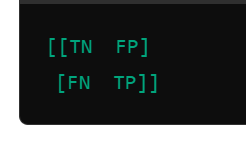

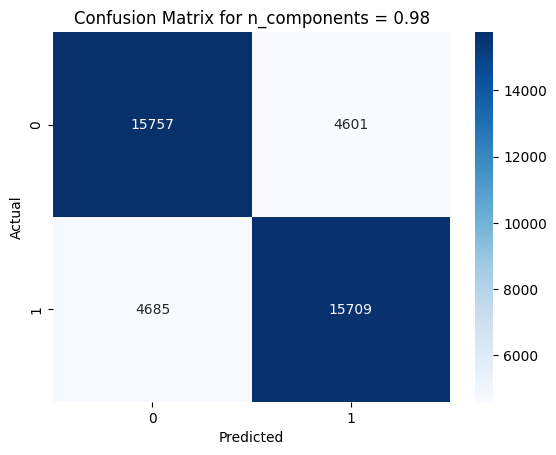

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix for n_components = {n_components}")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [ ]:
# Menampilkan jumlah data pada training dan testing set
print(f"Jumlah data training: {len(X_train_pca)}")
print(f"Jumlah data testing: {len(X_test_pca)}")

Jumlah data training: 163006
Jumlah data testing: 40752


In [ ]:
# Menampilkan jumlah baris dan kolom pada training dan testing set
print(f"Shape data training: {X_train_pca.shape}")
print(f"Shape data testing: {X_test_pca.shape}")

Shape data training: (163006, 12)
Shape data testing: (40752, 12)


In [ ]:
import pandas as pd

# Misalkan X_resampled_pca adalah hasil transformasi PCA
# Menampilkan hasil transformasi PCA dalam DataFrame
pca_columns = [f'PC{i+1}' for i in range(X_resampled_pca.shape[1])]  # Memberikan nama kolom seperti PC1, PC2, dll.
pca_df = pd.DataFrame(X_resampled_pca, columns=pca_columns)

# Menambahkan kolom indeks (opsional) untuk menampilkan angka 1, 2, 3, dst.
pca_df.index = pca_df.index + 1

# Menampilkan tiga baris pertama
pca_df.head(3)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
1,-0.551847,-1.592055,-0.158182,-0.875879,-0.244465,-0.801569,-0.108907,-0.941173,1.585075,0.501919,-0.111325,0.860511
2,-2.048036,-0.728473,-0.555011,-0.801932,-0.700017,-1.173752,-0.074210,-1.372101,-0.314632,0.021203,-0.342099,-0.311811
3,-2.240303,-1.616878,0.574769,-0.339524,-0.862005,-1.041362,-0.282170,-0.467120,0.857009,-0.461803,-0.807281,-0.436985


In [ ]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
1,-0.551847,-1.592055,-0.158182,-0.875879,-0.244465,-0.801569,-0.108907,-0.941173,1.585075,0.501919,-0.111325,0.860511
2,-2.048036,-0.728473,-0.555011,-0.801932,-0.700017,-1.173752,-0.074210,-1.372101,-0.314632,0.021203,-0.342099,-0.311811
3,-2.240303,-1.616878,0.574769,-0.339524,-0.862005,-1.041362,-0.282170,-0.467120,0.857009,-0.461803,-0.807281,-0.436985
4,-2.571001,0.899185,-1.103013,-0.424616,0.349535,-1.291997,-1.047897,-0.263934,0.379699,0.068540,-0.424855,0.261511
5,-0.494318,-1.248763,-2.174068,-1.019186,0.682985,-0.707153,0.730159,-0.594618,-0.219585,0.992264,0.395908,0.855717


<ipython-input-76-09d0c4b46b7d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pc_features, y=explained_variance_ratio, palette="Blues_d")  # Membuat bar plot


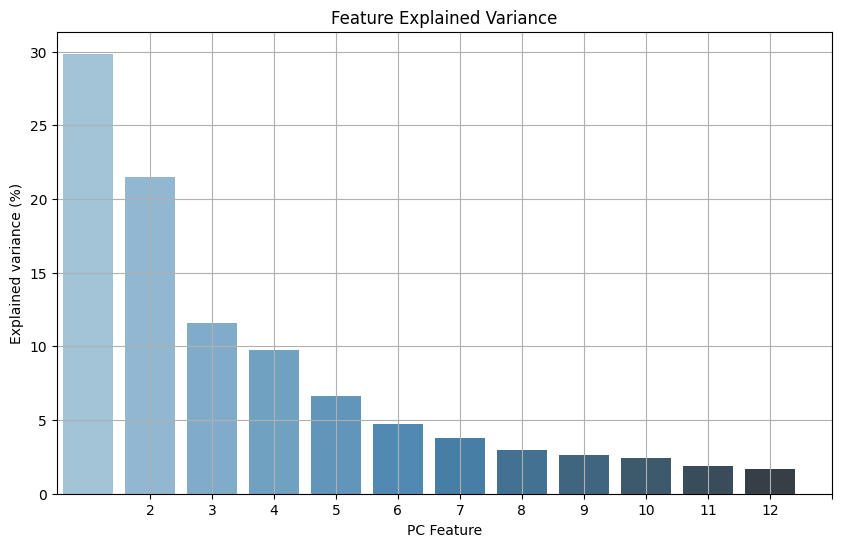

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Asumsikan pca adalah objek PCA yang telah diterapkan pada data Anda
explained_variance_ratio = pca.explained_variance_ratio_ * 100  # Ubah ke dalam persen
pc_features = np.arange(1, len(explained_variance_ratio) + 1)   # Buat nomor untuk PC Feature

# Membuat plot untuk visualisasi explained variance
plt.figure(figsize=(10, 6))  # Mengatur ukuran figure
sns.barplot(x=pc_features, y=explained_variance_ratio, palette="Blues_d")  # Membuat bar plot
plt.title('Feature Explained Variance')  # Judul plot
plt.xlabel('PC Feature')  # Label sumbu x
plt.ylabel('Explained variance (%)')  # Label sumbu y
plt.xticks(ticks=pc_features)  # Menampilkan nomor PC pada sumbu x
plt.grid(True)  # Menampilkan grid
plt.show()  # Menampilkan plot


## 2. Naive Bayes

In [ ]:
# Train-test split setelah dilakukan oversampling
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Melakukan train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [ ]:
# Menampilkan jumlah data pada training dan testing set
print(f"Jumlah data training: {len(X_train)}")
print(f"Jumlah data testing: {len(X_test)}")


Jumlah data training: 163006
Jumlah data testing: 40752


In [ ]:
# Menampilkan jumlah baris dan kolom pada training dan testing set
print(f"Shape data training: {X_train.shape}")
print(f"Shape data testing: {X_test.shape}")

Shape data training: (163006, 15)
Shape data testing: (40752, 15)


In [ ]:
# Inisialisasi model Gaussian Naive Bayes
model_nb = GaussianNB()

# Melatih model dengan data training
model_nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Evaluasi model pada data testing
y_test_pred = model_nb.predict(X_test)

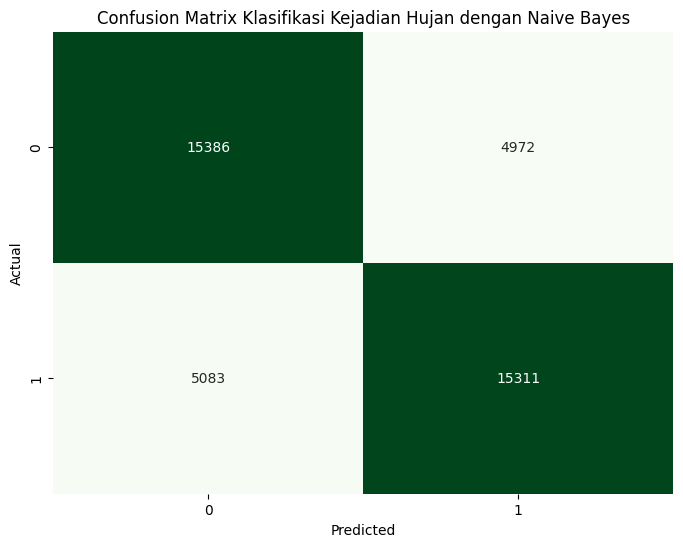

In [ ]:
# Confusion Matrix Model Klasifikasi Kejadian Hujan dengan Naive Bayes

# Membuat prediksi untuk data test
y_test_pred = model_nb.predict(X_test)

# Membuat confusion matrix
cm_without_pca = confusion_matrix(y_test, y_test_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_without_pca, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Confusion Matrix Klasifikasi Kejadian Hujan dengan Naive Bayes")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [ ]:
# Menghitung metrik evaluasi
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)

# Mencetak nilai metrik evaluasi dengan 4 angka di belakang koma
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1 Score: {test_f1_score:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")


Test Accuracy: 0.7533
Test F1 Score: 0.7528
Test Precision: 0.7549
Test Recall: 0.7508


# Perbandingan Confusion Matrix

## 1. Confusion Matrix - PCA dan Naive Bayes

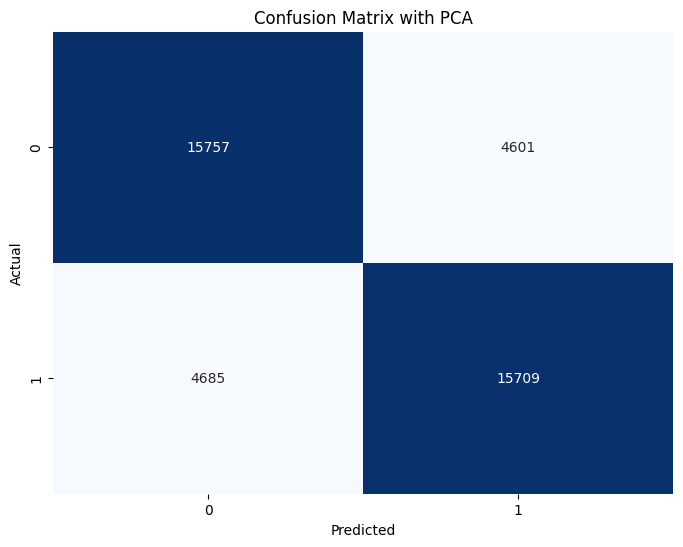

In [ ]:
# Melihat Confusion Matrix dengan PCA

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat prediksi untuk data test
y_test_pred_pca = model_nb_pca.predict(X_test_pca)

# Membuat confusion matrix
cm_with_pca = confusion_matrix(y_test_pca, y_test_pred_pca)

# Visualisasi confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_with_pca, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix with PCA")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()
